In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor


# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Restaurant_revenue.csv') # reading the dataset

In [3]:
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,-220.000000
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


o	What are the input and output variables?
- The Input variables: Number_of_Customers, Menu_Price, Marketing_Spend, Cuisine_Type, Average_Customer_Spending, Promotions, Reviews

- The Output/Target variable: Monthly_Revenue

## Descriptive Analysis
o	Number of columns and rows

In [4]:
# Number of columns and rows
rows = df.shape[0]
cols = df.shape[1]

print(f'Rows = {rows}')
print(f'Columns = {cols}')

Rows = 1000
Columns = 8


o	Percent of missing values by columns:

In [5]:
# Calculate total number of entries in the DataFrame
total_entries = df.shape[0]

# Calculate percentage of missing values for each column
missing_percentage = (df.isnull().sum() / total_entries) * 100

print("Percentage of missing values by columns:")
print(missing_percentage)

Percentage of missing values by columns:
Number_of_Customers          0.0
Menu_Price                   0.0
Marketing_Spend              0.0
Cuisine_Type                 0.0
Average_Customer_Spending    0.0
Promotions                   0.0
Reviews                      0.0
Monthly_Revenue              0.0
dtype: float64


- There are no missing values in the dataset

o	Means, medians, modes, correlations, variance, outliers

In [6]:
# Assuming df_train is your DataFrame
# Replace df_train with the name of your DataFrame

# Calculate statistics
statistics = df.describe()

print(statistics)

       Number_of_Customers   Menu_Price  Marketing_Spend  \
count          1000.000000  1000.000000      1000.000000   
mean             53.271000    30.219120         9.958726   
std              26.364914    11.278760         5.845586   
min              10.000000    10.009501         0.003768   
25%              30.000000    20.396828         4.690724   
50%              54.000000    30.860614        10.092047   
75%              74.000000    39.843868        14.992436   
max              99.000000    49.974140        19.994276   

       Average_Customer_Spending   Promotions      Reviews  Monthly_Revenue  
count                1000.000000  1000.000000  1000.000000      1000.000000  
mean                   29.477085     0.497000    49.837000       268.153260  
std                    11.471686     0.500241    29.226334       105.092609  
min                    10.037177     0.000000     0.000000      -220.000000  
25%                    19.603041     0.000000    24.000000       196.

In [7]:
mode_values = df.mode().iloc[0]
print(mode_values)

Number_of_Customers               71.0
Menu_Price                   10.009501
Marketing_Spend               0.003768
Cuisine_Type                  Japanese
Average_Customer_Spending    10.037177
Promotions                         0.0
Reviews                           24.0
Monthly_Revenue                 -220.0
Name: 0, dtype: object


## Data Visualization

#### Histogram for the target variable for checking the distribution:

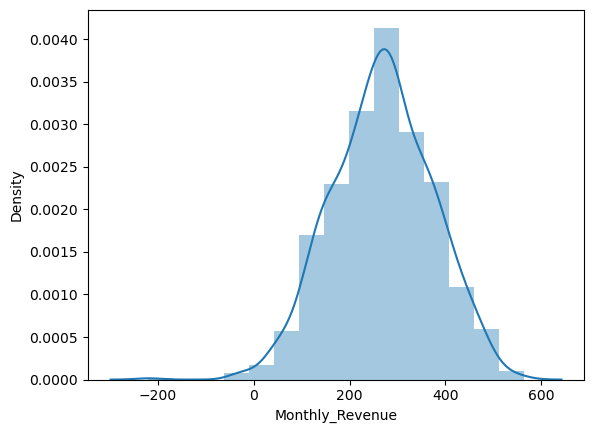

In [8]:
ax = sns.distplot(df['Monthly_Revenue'], bins = 15)

#### Histogram for the target variable, Monthly Revenue corresponding to the Cuisine Type:

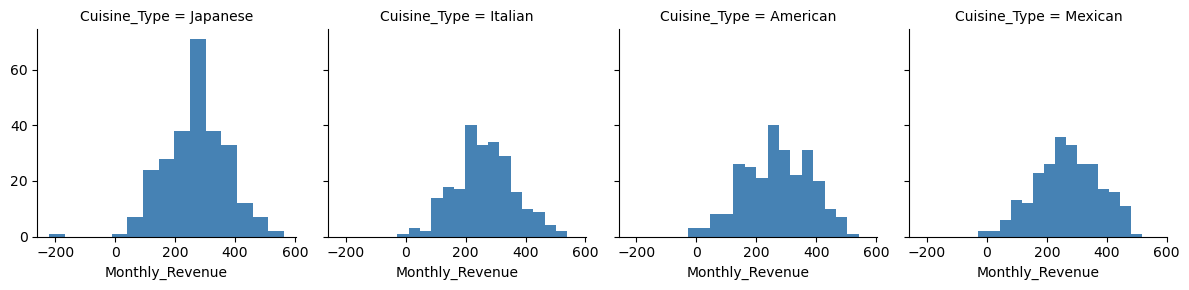

In [9]:
g = sns.FacetGrid(df, col = "Cuisine_Type", margin_titles = True)
ax = g.map(plt.hist,"Monthly_Revenue", color = "steelblue", bins = 15)

##### Business Inference: The Cuisine Type "Japanese", has the maximum monthly revenue and generates higher revenue compared to the other cuisines

#### Scatterplots for the correlation of variables

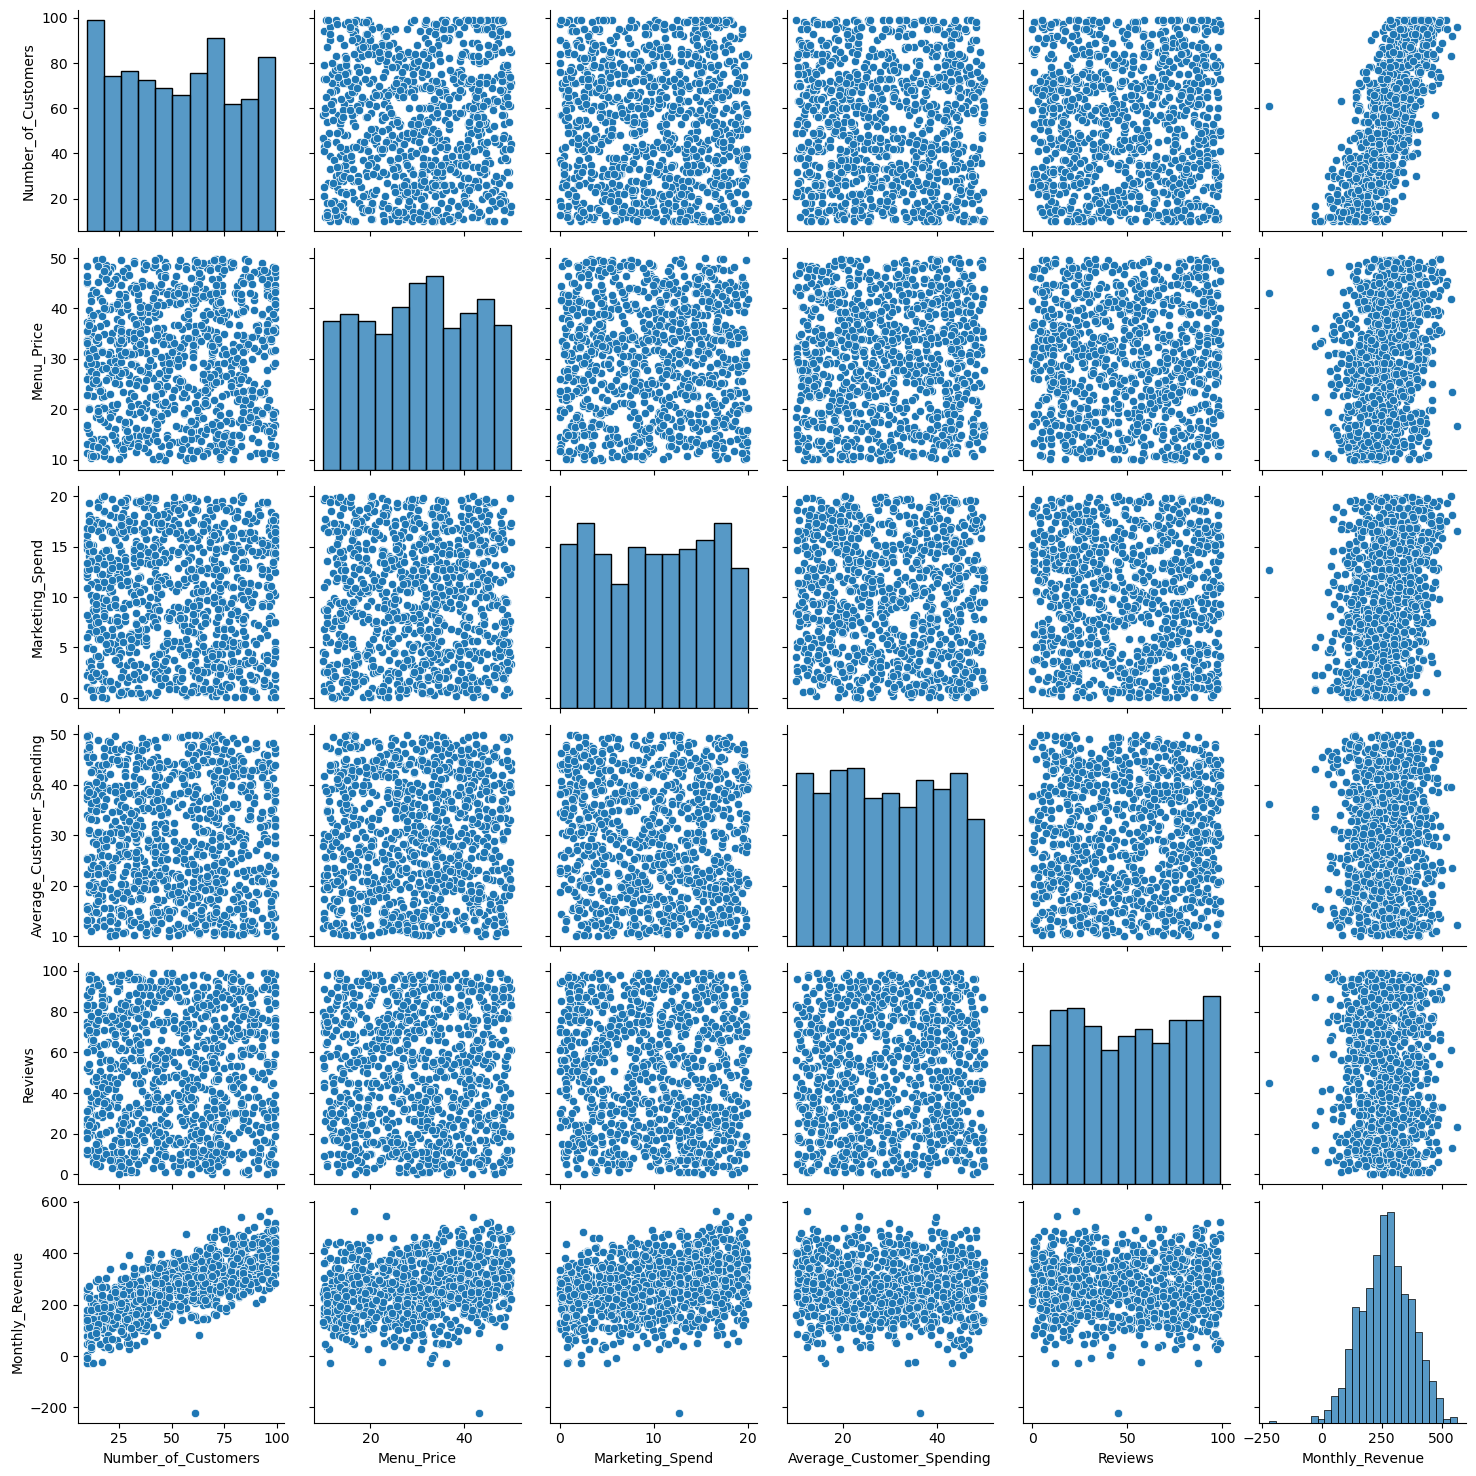

In [10]:
df_without_promotions = df.drop(columns=['Promotions'])

#Correlation with the target variable -> Monthly_Revenue
ax = sns.pairplot(df_without_promotions, kind='scatter', size = 2.5)

##### Business Inference: There is a clear linear relationship between Number_of_Customers and Monthly_Revenue. Menu_Price and Marketing_Spending also appear to exhibit a subtle linear correlation with Monthly_Revenue.

#### Heatmap of Correlation Matrix for Numerical Variables

Using Spearman Corelation Matrix to measure the strength and direction of monotonic relationships between variables

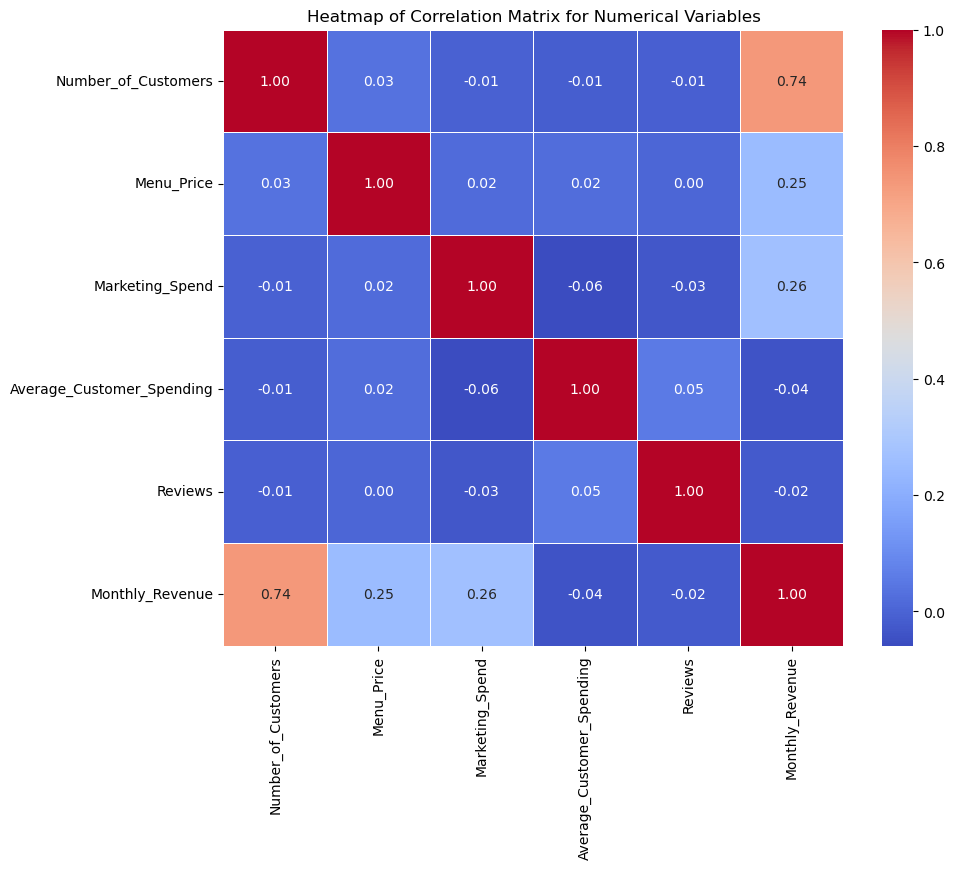

In [11]:
# Heatmap for numeric features: 
corr_matrix = df.drop(columns=['Cuisine_Type', 'Promotions']).corr()
 
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix for Numerical Variables')
plt.show()

##### Business Inference: Number of customers is highly positively correlated to the monthly revenue.

Using Spearman Corelation Matrix to measure the strength and direction of monotonic relationships between variables

In [12]:
import pingouin as pg
pg.corr(df['Number_of_Customers'], df['Monthly_Revenue'], method = 'spearman')

,n,r,CI95%,p-val,power
spearman,1000,0.750889,"[0.72, 0.78]",5.156939e-182,1.0


##### Business Inference:
- Spearman correlation coefficient is approximately 0.7509, indicating a strong positive monotonic relationship
- As Number_of_Customers increases, the Monthly_Revenue tends to increase as well
- the p-value is very close to zero (5.156939e-182), we can conclude that the observed correlation is statistically significant.
    

#### Box plot for variables to identify outliers

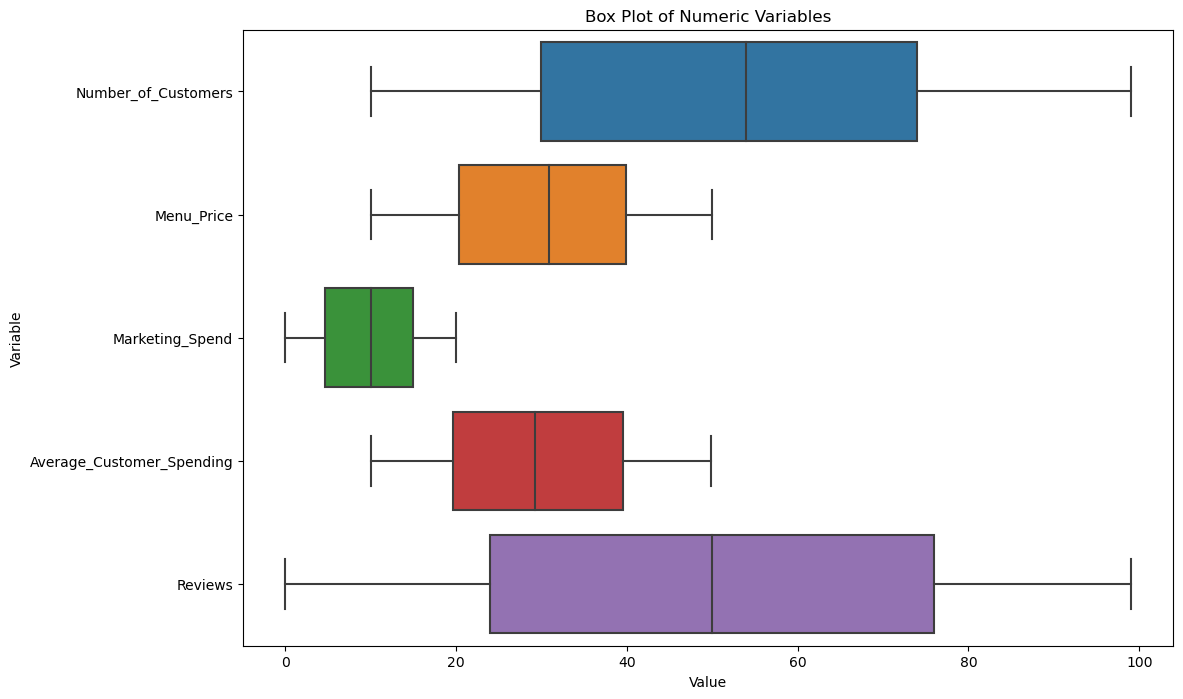

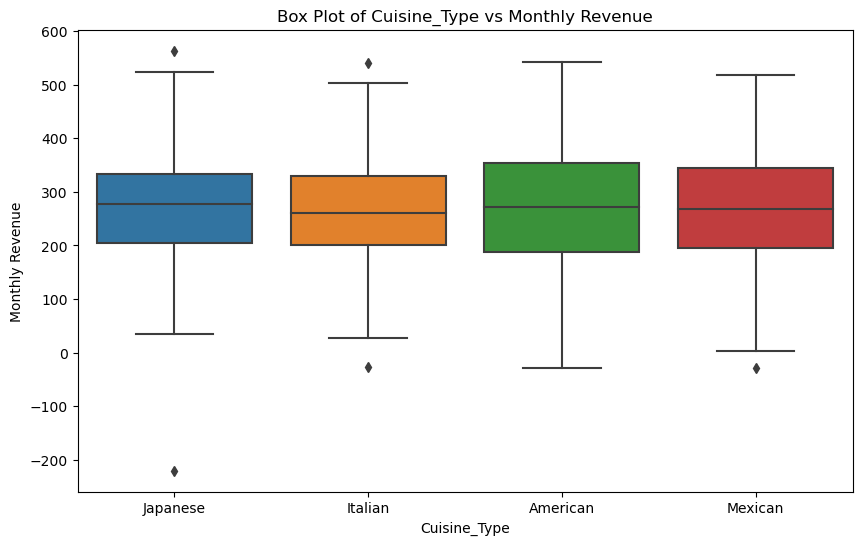

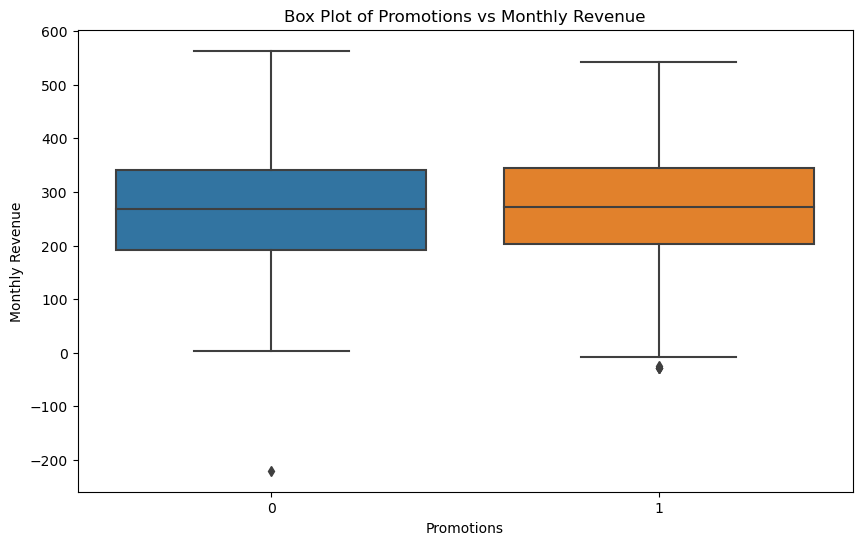

In [13]:
# Categorize numerical and categorical variables: 
numeric_features = ['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 
                    'Average_Customer_Spending', 'Reviews']
categorical_features = ['Cuisine_Type', 'Promotions']

#Box plots for numeric features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_features], orient='h')
plt.title('Box Plot of Numeric Variables')
plt.xlabel('Value')
plt.ylabel('Variable')
plt.show()
 
#Box plots for categorical features
for cat_feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_feature, y='Monthly_Revenue', data=df)
    plt.title(f'Box Plot of {cat_feature} vs Monthly Revenue')
    plt.xlabel(cat_feature)
    plt.ylabel('Monthly Revenue')
    plt.show()

## Data Preprocessing:

From the box plot, there are obviously some outliers in Monthly_Revenue. Proceeding ahead, we use the whisker range to eliminate outliers:

In [14]:
median = np.median(df["Monthly_Revenue"])
upper_quartile = np.percentile(df["Monthly_Revenue"], 75)
lower_quartile = np.percentile(df["Monthly_Revenue"], 25)
 
iqr = upper_quartile - lower_quartile
upper_whisker = df["Monthly_Revenue"].loc[df["Monthly_Revenue"]<=upper_quartile+1.5*iqr].max()
lower_whisker = df["Monthly_Revenue"].loc[df["Monthly_Revenue"]>=lower_quartile-1.5*iqr].min()
 
print(f'Upper Whisker = {upper_whisker}')
print(f'Lower Whisker = {lower_whisker}')

Upper Whisker = 542.4672824
Lower Whisker = -7.627381568


Creating a filtered dataframe without outliers for Monthly_Revenue:

In [15]:
filtered_df = df.loc[(df['Monthly_Revenue'] <= upper_whisker) & (df['Monthly_Revenue'] >= lower_whisker)]
filtered_df

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121
5,92,19.427670,13.114473,American,43.099950,1,10,399.867507
...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,Japanese,19.033585,1,40,249.312034
996,31,20.615496,5.822885,Mexican,17.040990,0,57,110.228768
997,69,17.110656,4.141898,Japanese,44.649315,0,55,312.212552
998,73,37.664722,3.046556,Japanese,27.767358,0,23,272.482204


In [16]:
print(filtered_df.columns)

Index(['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Cuisine_Type',
       'Average_Customer_Spending', 'Promotions', 'Reviews',
       'Monthly_Revenue'],
      dtype='object')


Evaluating the categorical variable: Cuisine Type
- Percentages Pie chart:

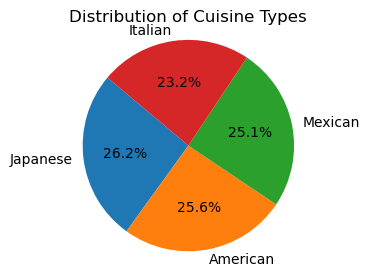

In [17]:
cuisine_counts = filtered_df['Cuisine_Type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(3, 3))
plt.pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Cuisine Types')
plt.show()

##### Business Inference: In our filtered dataset, the four types of cuisine are nearly evenly distributed.

#### Encoding Categorical Variable

In [18]:
dummy_df = pd.get_dummies(filtered_df['Cuisine_Type'], prefix='Cuisine', drop_first=True)
dummy_df = dummy_df.astype(int)
# Concatenate the dummy variables with the original DataFrame
filtered_df = pd.concat([filtered_df, dummy_df], axis=1)

# Drop the original "Cuisine_Type" column
filtered_df = filtered_df.drop('Cuisine_Type', axis=1)

filtered_df.head(10)

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican
1,24,40.020077,4.577892,17.952562,0,36,221.319091,1,0,0
2,81,41.981485,4.652911,22.600420,1,91,326.529763,0,1,0
3,70,43.005307,4.416053,18.984098,1,59,348.190573,1,0,0
4,30,17.456199,3.475052,12.766143,1,30,185.009121,1,0,0
5,92,19.427670,13.114473,43.099950,1,10,399.867507,0,0,0
6,96,35.350343,16.960318,20.181622,0,86,496.653687,0,0,0
7,84,46.314645,14.486349,28.921100,1,1,417.158607,1,0,0
8,84,22.647863,15.841873,11.732611,0,26,352.148065,0,0,0
9,97,33.532267,8.095969,37.973579,0,98,272.793517,1,0,0
10,33,37.319283,13.081516,23.222440,0,1,318.773209,0,0,1


## Splitting Training and Testing Datasets

Defining Input and Output variables for the models:

In [19]:
X = filtered_df.drop(columns=['Monthly_Revenue'])  # Features
Y = filtered_df['Monthly_Revenue']  # Target variable

In [20]:
X

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican
1,24,40.020077,4.577892,17.952562,0,36,1,0,0
2,81,41.981485,4.652911,22.600420,1,91,0,1,0
3,70,43.005307,4.416053,18.984098,1,59,1,0,0
4,30,17.456199,3.475052,12.766143,1,30,1,0,0
5,92,19.427670,13.114473,43.099950,1,10,0,0,0
...,...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,19.033585,1,40,0,1,0
996,31,20.615496,5.822885,17.040990,0,57,0,0,1
997,69,17.110656,4.141898,44.649315,0,55,0,1,0
998,73,37.664722,3.046556,27.767358,0,23,0,1,0


Training and Testing datasets:

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.45, random_state=42)

# Variable Selection and Fitting Models: 

### Random Forest, Decision Tree and Gradient Boosting models


Mean Squared Error (MSE): 4005.5910164068036


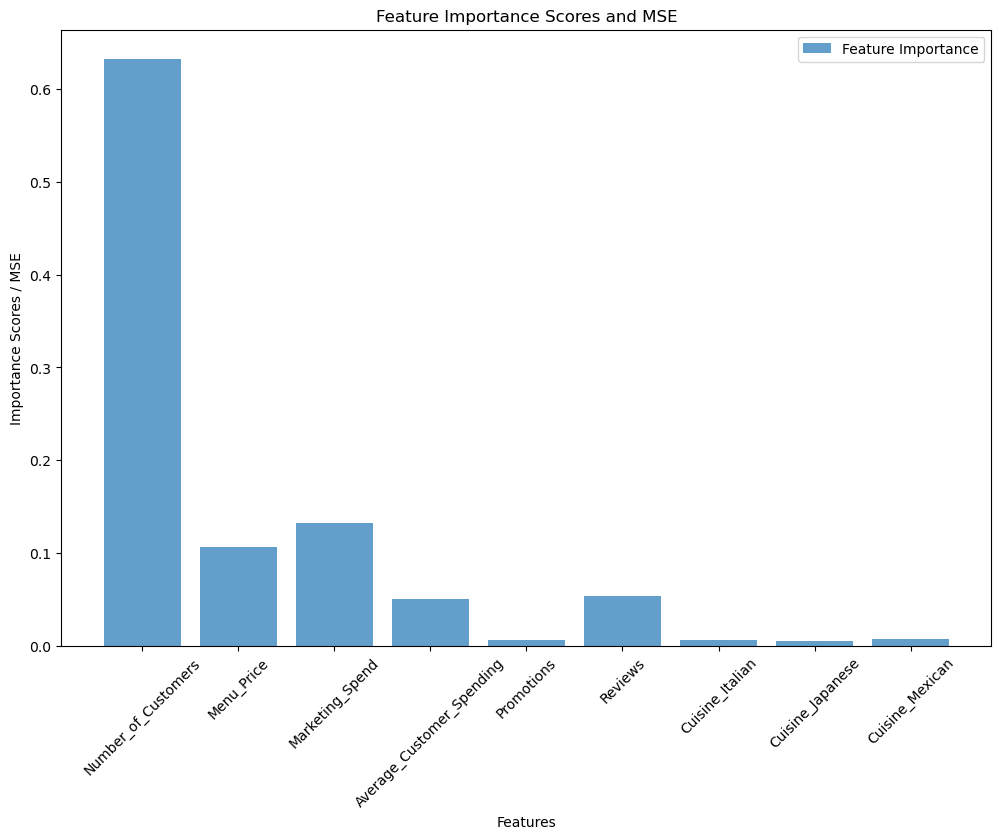

Selected Features: Index(['Number_of_Customers', 'Menu_Price', 'Marketing_Spend'], dtype='object')


In [22]:
# Train a Random Forest Regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)

# Extract feature importance scores
feature_importances = rf_model.feature_importances_

# Plot feature importance scores
plt.figure(figsize=(12, 8))
plt.bar(X.columns, feature_importances, alpha=0.7, label='Feature Importance')

# Evaluate model using Mean Squared Error
Y_pred = rf_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"\nMean Squared Error (MSE): {mse}")

plt.xlabel('Features')
plt.ylabel('Importance Scores / MSE')
plt.title('Feature Importance Scores and MSE')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Select features based on importance scores
sfm = SelectFromModel(rf_model, threshold=0.1)  # Adjust threshold as needed
sfm.fit(X_train, Y_train)
selected_features = X.columns[sfm.get_support()]
print("Selected Features:", selected_features)


Random Forest:


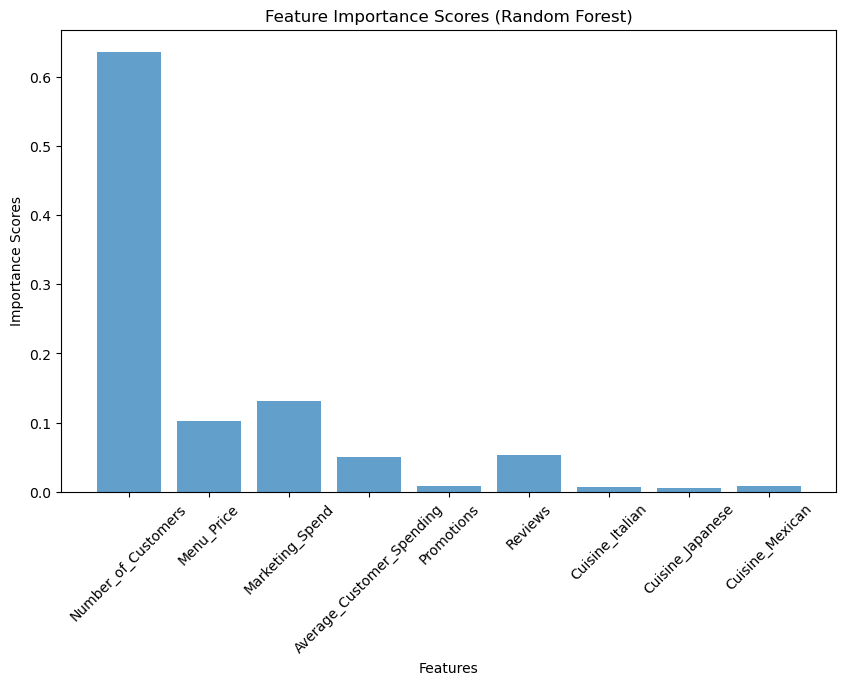

Selected Features:
Number_of_Customers
Menu_Price
Marketing_Spend
Mean Squared Error (Selected Features): 3991.137658554595

Decision Tree:


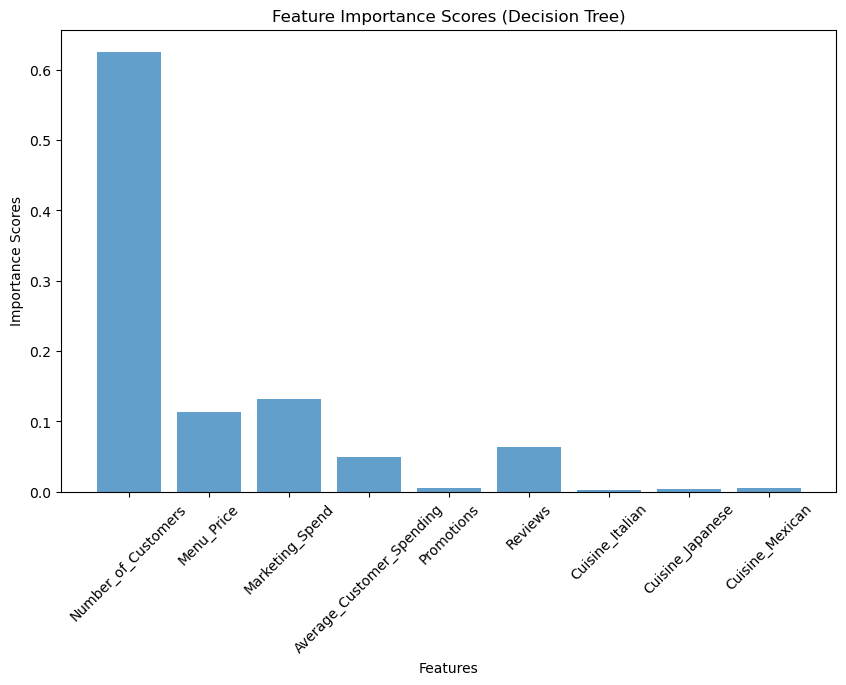

Selected Features:
Number_of_Customers
Menu_Price
Marketing_Spend
Mean Squared Error (Selected Features): 7377.399283202882

Gradient Boosting:


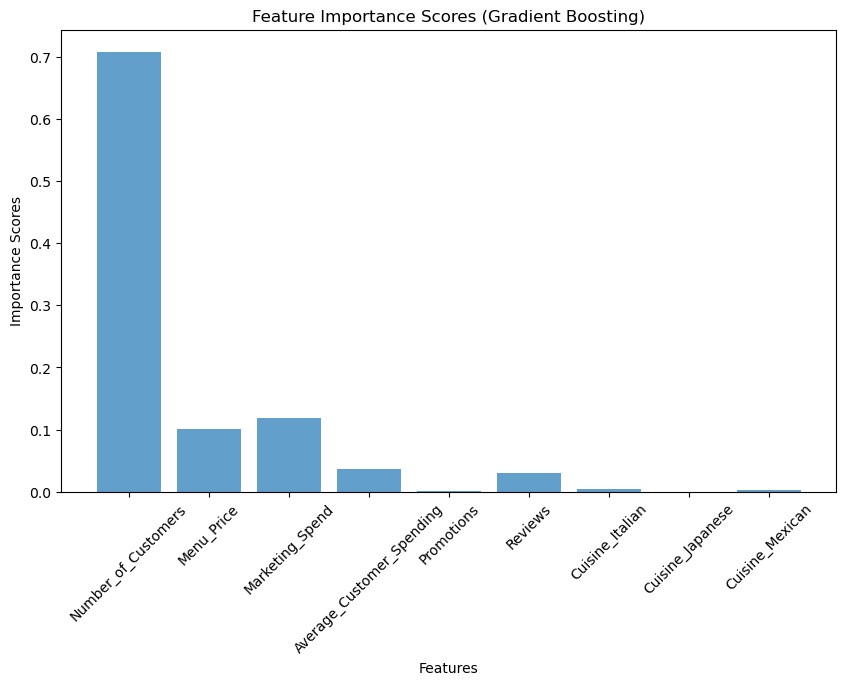

Selected Features:
Number_of_Customers
Menu_Price
Marketing_Spend
Mean Squared Error (Selected Features): 3959.1317023494157


In [23]:
#Comparing Models
models = {
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Perform feature selection, plot feature importance scores, and evaluate each model
for model_name, model in models.items():
    print(f"\n{model_name}:")
    
    # Train the model
    model.fit(X_train, Y_train)
    
    # Extract feature importance scores (if applicable)
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        feature_importances = model.coef_
    else:
        print("Model does not support feature importance calculation.")
        continue
    
    # Plot feature importance scores
    plt.figure(figsize=(10, 6))
    plt.bar(X.columns, feature_importances, alpha=0.7)
    plt.xlabel('Features')
    plt.ylabel('Importance Scores')
    plt.title(f'Feature Importance Scores ({model_name})')
    plt.xticks(rotation=45)
    plt.show()
    
    # Perform feature selection:
    if model_name in ['Random Forest', 'Decision Tree', 'Gradient Boosting']:
        sfm = SelectFromModel(model, threshold=0.1)  # Adjust threshold as needed
        sfm.fit(X_train, Y_train)
        selected_features = X.columns[sfm.get_support()]
        print("Selected Features:")
        for feature in selected_features:
            print(feature)
        X_train_selected = sfm.transform(X_train)
        X_test_selected = sfm.transform(X_test)
        model.fit(X_train_selected, Y_train)
        Y_pred_selected = model.predict(X_test_selected)
        mse_selected = mean_squared_error(Y_test, Y_pred_selected)
        print(f"Mean Squared Error (Selected Features): {mse_selected}")
    else:
        # Evaluate model using Mean Squared Error
        y_pred = model.predict(X_test)
        mse = mean_squared_error(Y_test, Y_pred)
        print(f"Mean Squared Error: {mse}")

In [24]:
# Fitting:
tree_models = {
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
}

# Perform fitting for tree-based models
for model_name, model in tree_models.items():
    print(f"\n{model_name}:")
    
    # Fit model with previously selected features
    model.fit(X_train_selected, Y_train)
    
    # Evaluate model using Mean Squared Error
    Y_pred_selected = model.predict(X_test_selected)
    mse_selected = mean_squared_error(Y_test, Y_pred_selected)
    print(f"Mean Squared Error (Selected Features): {mse_selected}")
    
    # Print additional performance metrics
    r2_score_selected = model.score(X_test_selected, Y_test)
    print(f"R^2 Score (Selected Features): {r2_score_selected}")


Random Forest:
Mean Squared Error (Selected Features): 3993.1462586481307
R^2 Score (Selected Features): 0.5929596592828056

Decision Tree:
Mean Squared Error (Selected Features): 7431.110519750779
R^2 Score (Selected Features): 0.24251165323192792

Gradient Boosting:
Mean Squared Error (Selected Features): 3952.4525024601294
R^2 Score (Selected Features): 0.597107766892927


#### Hyperparameter tuning for the tree models:

In [25]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune for each model
param_grid = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],  # Number of trees in the forest
        'max_depth': [None, 10, 20],       # Maximum depth of the trees
        # Add more hyperparameters as needed
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],       # Maximum depth of the tree
        # Add more hyperparameters as needed
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],  # Number of boosting stages
        'learning_rate': [0.05, 0.1, 0.2], # Learning rate
        # Add more hyperparameters as needed
    }
}

# Perform hyperparameter tuning and model evaluation
for model_name, model in models.items():
    print(f"\n{model_name}:")
    
    # Define the grid search using cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    # Train the grid search
    grid_search.fit(X_train_selected, Y_train)
    
    # Get the best estimator and its hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)
    
    # Evaluate the best model
    Y_pred_selected = best_model.predict(X_test_selected)
    mse_selected = mean_squared_error(Y_test, Y_pred_selected)
    print(f"Mean Squared Error (Selected Features): {mse_selected}")
    
    # Print additional performance metrics
    r2_score_selected = best_model.score(X_test_selected, Y_test)
    print(f"R^2 Score (Selected Features): {r2_score_selected}")



Random Forest:
Best Parameters: {'max_depth': 10, 'n_estimators': 300}
Mean Squared Error (Selected Features): 3926.311990890961
R^2 Score (Selected Features): 0.5997723932417847

Decision Tree:
Best Parameters: {'max_depth': 10}
Mean Squared Error (Selected Features): 6733.554995354139
R^2 Score (Selected Features): 0.3136167968776542

Gradient Boosting:
Best Parameters: {'learning_rate': 0.05, 'n_estimators': 100}
Mean Squared Error (Selected Features): 3791.813896090338
R^2 Score (Selected Features): 0.6134824220730335


Among the 3 Tree Regressor models, evaluated with hyperparameter tuning, the Gradient Boosting Regressor model performs the best with the lowest Mean Squared error and Highest R Squared. Let's consider the Regression models now:

### Regression Models

#### Forward Stepwise for Variables Selection on Linear Regression

In [26]:
## Forward Stepwise Selection on Linear Model:

# Initialize variables
features = list(X_train.columns)
linear_selected_features = []
min_mse = np.inf  # Initialize to infinity, as we want to minimize MSE
model = LinearRegression()

while len(features) > 0:
    best_feature = None
    for feature in features:
        # Test adding this feature to the selected features
        X_train_selected = X_train[linear_selected_features + [feature]] if linear_selected_features else X_train[[feature]]
        model.fit(X_train_selected, Y_train)
        
        # Predict on the test set and calculate MSE
        X_test_selected = X_test[linear_selected_features + [feature]] if linear_selected_features else X_test[[feature]]
        Y_pred = model.predict(X_test_selected)
        mse = mean_squared_error(Y_test, Y_pred)
        
        # Check if we got a better (lower) MSE
        if mse < min_mse:
            min_mse = mse
            best_feature = feature
    
    if best_feature is None:
        print("No feature improves the model significantly.")
        break
    
    # Add the best feature to the selected features
    linear_selected_features.append(best_feature)
    features.remove(best_feature)
    print(f"Added {best_feature}, MSE: {min_mse:.4f}")
    
print(f"Selected features: {linear_selected_features}")

Added Number_of_Customers, MSE: 4413.8489
Added Marketing_Spend, MSE: 3616.2362
Added Menu_Price, MSE: 2988.7910
Added Cuisine_Japanese, MSE: 2988.1756
Added Average_Customer_Spending, MSE: 2988.0419
No feature improves the model significantly.
Selected features: ['Number_of_Customers', 'Marketing_Spend', 'Menu_Price', 'Cuisine_Japanese', 'Average_Customer_Spending']


#### Lasso Model with Hyperparameter Tuning

Finding optimal alpha for Lasso Model

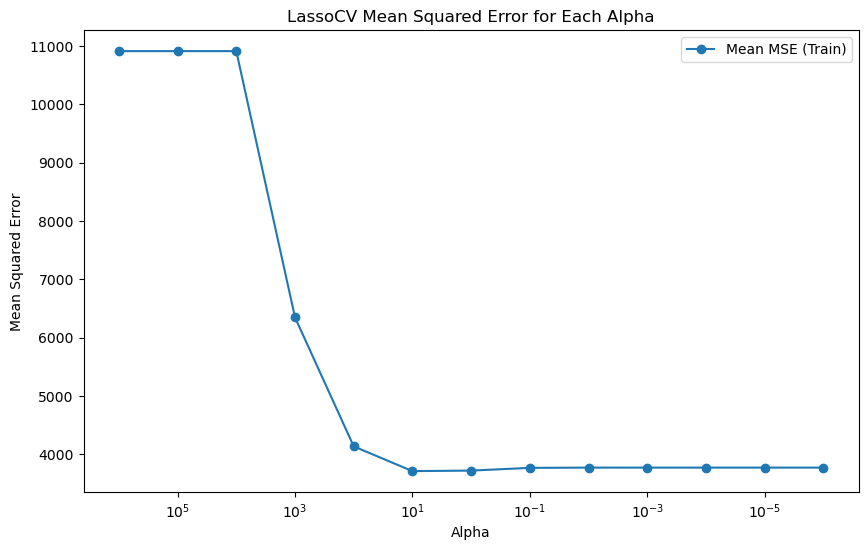

Optimal alpha for Lasso: 10.0


In [27]:
# Set up LassoCV to search over a range of alphas
lasso_cv = LassoCV(alphas=np.logspace(-6, 6, 13), cv=10, random_state=42)

# Fit the model
lasso_cv.fit(X_train, Y_train)

# Plotting MSE across different alpha values used during the Lasso regression
mean_mse_lasso = np.mean(lasso_cv.mse_path_, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(lasso_cv.alphas_, mean_mse_lasso, '-o', label='Mean MSE (Train)')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('LassoCV Mean Squared Error for Each Alpha')
plt.xscale('log')
plt.gca().invert_xaxis()  
plt.legend()
plt.show()

# Print the optimal alpha value found 
print(f"Optimal alpha for Lasso: {lasso_cv.alpha_}")

#### Ridge Model with Hyperparameter Tuning

Finding optimal alpha for Ridge Model

Fitting 5 folds for each of 91 candidates, totalling 455 fits


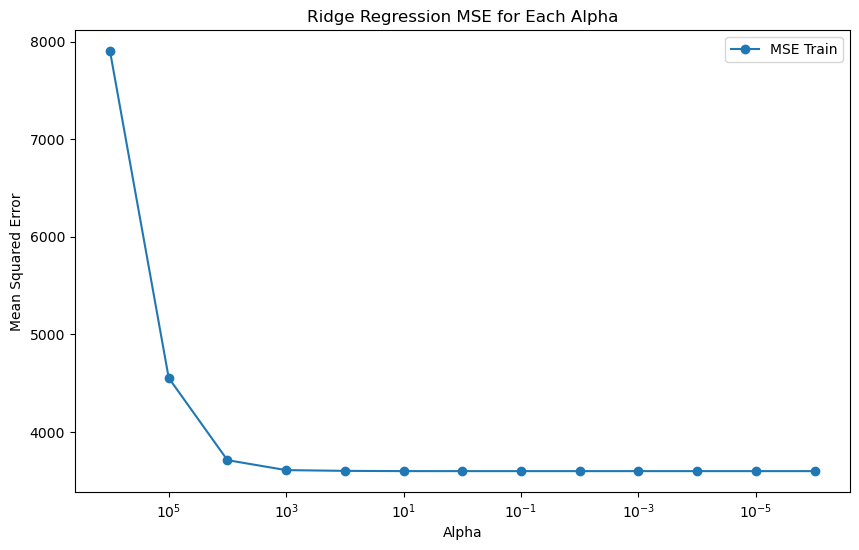

Best Parameters: {'alpha': 1000, 'solver': 'saga'}


In [28]:
# Defining the parameter grid for Ridge Regression
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
mse_train = []

param_grid = {
    'alpha': alphas,
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Initialize the Ridge Regression model
ridge = Ridge()

# Initialize the Grid Search with cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(X_train, Y_train)

# Plotting MSE across different alpha values used during the Ridge regression 
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, Y_train)
    Y_train_pred = model.predict(X_train)
    mse_train.append(mean_squared_error(Y_train, Y_train_pred))

plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_train, '-o', label='MSE Train')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression MSE for Each Alpha')
plt.xscale('log')
plt.gca().invert_xaxis() 
plt.legend()
plt.show()

# Printing the best parameters found by Grid Search
print("Best Parameters:", grid_search.best_params_)

#### Fitting Regression Models

In [29]:
# Linear Regression model with all variables (to compare)
linear_all = LinearRegression()
linear_all.fit(X_train, Y_train)

# Linear Regression model suggested by Forward Stepwise Selection
linear_reg = LinearRegression()
linear_reg.fit(X_train[linear_selected_features], Y_train)

# Lasso model with optimal alpha
lasso = Lasso(alpha=10, random_state=42)  
lasso.fit(X_train, Y_train)

# Ridge model with best paramters
ridge = Ridge(alpha=1000, solver='saga', random_state=42)  # Alpha is the regularization strength
ridge.fit(X_train, Y_train)

Ridge(alpha=1000, random_state=42, solver='saga')

#### Performance Indicators for Regression Models

In [31]:
# Computes the confusion matrix and performence indicators
def get_performance(actual_Y, pred_Y):
    mse = mean_squared_error(actual_Y, pred_Y)    # Calculate MSE
    r2 = r2_score(actual_Y, pred_Y)   # Calculate R-squared
    return mse, r2

# Prediction on regression models
pred_Y_linear_all = linear_all.predict(X_test) 
pred_Y_linear_reg = linear_reg.predict(X_test[linear_selected_features])  
pred_Y_ls = lasso.predict(X_test)  
pred_Y_ridge = ridge.predict(X_test)  

# MSE and R-squared for three models
mse_linear_all, r2_linear_all = get_performance(Y_test, pred_Y_linear_all)
mse_linear, r2_linear = get_performance(Y_test, pred_Y_linear_reg)
mse_lasso, r2_lasso = get_performance(Y_test, pred_Y_ls)
mse_ridge, r2_ridge = get_performance(Y_test, pred_Y_ridge)

# Builds a dataframe using the performance indicators so that we can compare the models easily

perf = pd.DataFrame([mse_linear_all, mse_linear, mse_lasso, mse_ridge], columns = ['MSE'], 
                    index = ['Linear Regression - All Variables','Linear Regression - Stepwise Selection', 'Lasso', 'Ridge'])

perf['R-squared'] = np.asarray([r2_linear_all, r2_linear, r2_lasso, r2_ridge])

perf

,MSE,R-squared
Linear Regression - All Variables,3037.174967,0.690657
Linear Regression - Stepwise Selection,2988.041854,0.695661
Lasso,3022.408723,0.692161
Ridge,3023.853807,0.692013


Among three Regression Models, Linear Regression Model suggested by Forward Stepwise Slection performs the best with highest R-squared and smallest MSE.

#### Conclusion: Comparing MSE and R-squared of all models performed, Linear Regression suggested by Forward Stepwise Selection is chosen as the best model to predict restaurant's revenue.